**ANEMOMETER PROJECT CODE FILE:**

Author: Muntaha Pasha

**IMPORTS NEEDED**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import csv
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm

C:\Users\munta\anaconda3\lib\site-packages\windrose\windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
C:\Users\munta\anaconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\Users\munta\anaconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\Users\munta\anaconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc

**READ IN WXT DATA**

Read in the 2018, 2019, and 2020 files.

In [2]:
dfWXT2018 = pd.read_csv('WXT2018', encoding='utf-8')
dfWXT2019 = pd.read_csv('WXT2019', encoding='utf-8')
dfWXT2020 = pd.read_csv('WXT2020', encoding='utf-8')

Concatenate the dataframes together into one continuous record.

In [3]:
frames = [dfWXT2018, dfWXT2019, dfWXT2020]
dfWXT = pd.concat(frames, sort=False)
dfWXT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281391 entries, 0 to 75055
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    281391 non-null  object 
 1   wdir        281391 non-null  int64  
 2   wspd        281391 non-null  float64
 3   wspd_max    281391 non-null  float64
 4   tdry        281391 non-null  float64
 5   rh          281391 non-null  float64
 6   pres        281391 non-null  float64
 7   rain_accum  281391 non-null  float64
 8   batt        281391 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.5+ MB


**SORTING WXT VALUES:**

We want to order this dataframe in descending order, putting all our max wind speeds at the top of the dataframe. It will go from greatest to least.

In [4]:
dfWXTSORT = dfWXT.sort_values('wspd', ascending=False)
dfWXTSORT.head(20)

,datetime,wdir,wspd,wspd_max,tdry,rh,pres,rain_accum,batt
81368,2019-10-11T15:17:46.8599,316,24.4,35.3,-0.9,31.9,814.0,221.6,13.9
81365,2019-10-11T15:02:46.8575,316,24.4,35.3,-1.0,31.9,814.0,220.5,13.9
81372,2019-10-11T15:37:46.8620,316,24.4,35.3,-0.1,29.0,814.3,222.5,13.9
81371,2019-10-11T15:32:46.8622,316,24.4,35.3,-0.3,31.2,814.2,222.4,13.9
81370,2019-10-11T15:27:46.8626,316,24.4,35.3,-0.5,31.8,814.0,222.1,13.9
81369,2019-10-11T15:22:46.8590,316,24.4,35.3,-0.6,31.7,814.1,221.9,13.9
81367,2019-10-11T15:12:46.8602,316,24.4,35.3,-1.0,32.6,814.1,221.0,13.9
81366,2019-10-11T15:07:46.8567,316,24.4,35.3,-1.0,34.5,813.7,220.7,13.9
9176,2020-02-01T21:22:22.2075,269,21.4,33.0,12.3,15.8,810.2,7.4,13.9
6498,2019-01-23T13:44:18.5936,263,21.3,34.8,-2.1,29.1,805.1,0.9,13.9


**GETTING THE TENTH PERCENTILE:**

Next thing we want to do is from our sorted Dataframe (Highest Wind Spds at Top, Lowest at Bottom), we want to take the top 10th percent of our data. So we specify how much of it we want to keep ($n$), and then we take that top 10%.

In [5]:
#Want top 10th percentile
n = 10
#Dataframe WXT Top Ten:
dfWXTTT = dfWXTSORT.head(int(len(dfWXTSORT)*(n/100)))
dfWXTTT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28139 entries, 81368 to 65734
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    28139 non-null  object 
 1   wdir        28139 non-null  int64  
 2   wspd        28139 non-null  float64
 3   wspd_max    28139 non-null  float64
 4   tdry        28139 non-null  float64
 5   rh          28139 non-null  float64
 6   pres        28139 non-null  float64
 7   rain_accum  28139 non-null  float64
 8   batt        28139 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 2.1+ MB


**CHECKING FOR CORRECTNESS:**

One other way to make sure I took the Top Tenth of all WXT data is to plot my Top Ten Dataframe against the Full WXT Dataframe. $\checkmark$

Text(0.5, 1.0, 'Top Tenth Percentile for WXT vs. All WXT')

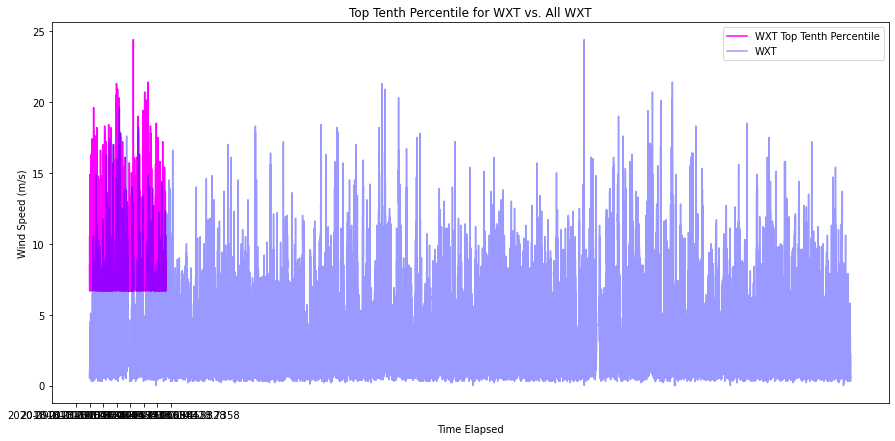

In [6]:
dfSWXT = dfWXTTT.sort_values('datetime', ascending=True)
ax = dfSWXT.plot(kind = 'line', x = 'datetime', y = 'wspd', color='magenta', figsize = (15, 7), label = "WXT Top Tenth Percentile")
dfWXT.plot(kind = 'line', x = 'datetime', y = 'wspd', color = 'blue', alpha = 0.4, figsize = (15, 7), ax = ax, label = "WXT")
ax.set_xlabel("Time Elapsed")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Top Tenth Percentile for WXT vs. All WXT")

The axis looks a little weird, but we can clearly see this is taking the top tenth of our max wind speed data for WXT. It's taking the top wind speeds that cover 10% of our full data. $\checkmark$

**AVERAGING WXT DATA (24-HOUR MEAN):**

Now let's try and smooth out our data and look at WXT data graphed over a period of a day. We know WXT files are in 5-minute intervals, and there are 288 5-minute intervals in the day. So we need to combine the mean over each consecutive $288$ data points to make one point for a day.

In [11]:
dfWXT['datetime'] =  pd.to_datetime(dfWXT['datetime'])
df_new = dfWXT.groupby(dfWXT.datetime.dt.date).mean()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 2018-01-01 to 2020-09-18
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wdir        982 non-null    float64
 1   wspd        982 non-null    float64
 2   wspd_max    982 non-null    float64
 3   tdry        982 non-null    float64
 4   rh          982 non-null    float64
 5   pres        982 non-null    float64
 6   rain_accum  982 non-null    float64
 7   batt        982 non-null    float64
dtypes: float64(8)
memory usage: 69.0+ KB


Text(0.5, 1.0, 'Daily Average for WXT')

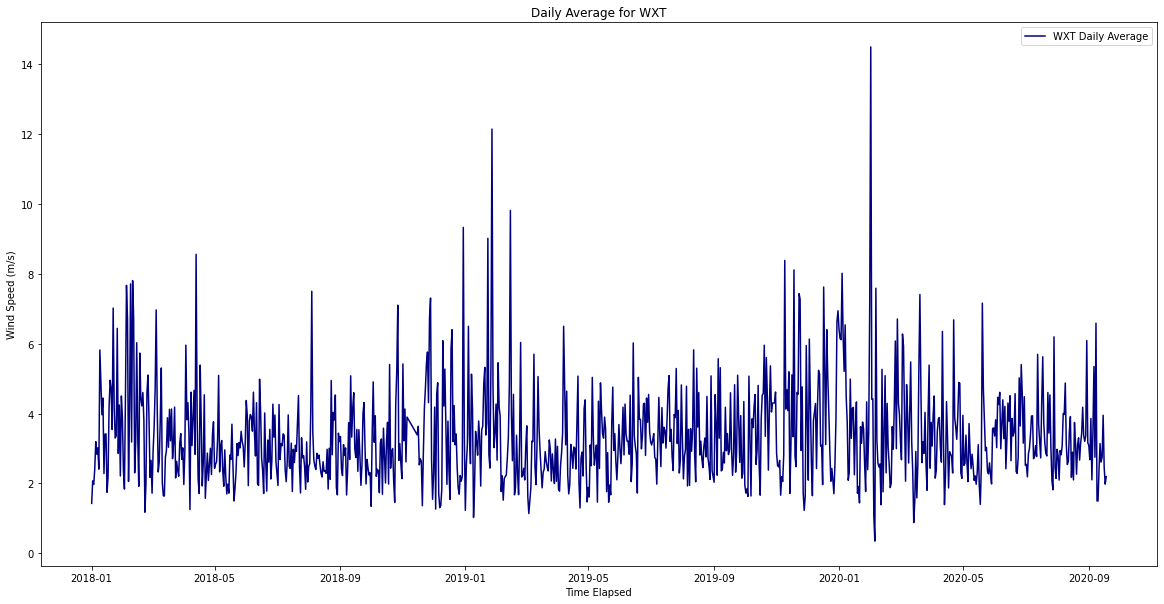

In [19]:
ax = df_new.plot(kind = 'line', y = 'wspd', color='navy', figsize = (20, 10), label = "WXT Daily Average")
ax.set_xlabel("Time Elapsed")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Daily Average for WXT")

**CONVERTING SONIC DATA INTO WXT TIME STAMPS (5-MIN INTERVALS)**

For 2018, 2019, and 2020, convert into 5-minute intervals.

2018 Conversion

In [23]:
s = pd.Series(dfSonic2018.index // 300)
dfSonic2018 = dfSonic2018[s.groupby(s).transform('count') == 300]
new_df2018 = dfSonic2018.groupby(dfSonic2018.index // 300).agg({'datetime':'last', 'Spd':'mean', 'Dir':'mean'})
new_df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98033 entries, 0 to 98032
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  98033 non-null  object 
 1   Spd       98033 non-null  float64
 2   Dir       98033 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.0+ MB


2019 Conversion

In [24]:
s2 = pd.Series(dfSonic2019.index // 300)
dfSonic2019 = dfSonic2019[s2.groupby(s2).transform('count') == 300]
new_df2019 = dfSonic2019.groupby(dfSonic2019.index // 300).agg({'datetime':'last', 'Spd':'mean', 'Dir':'mean'})
new_df2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104771 entries, 0 to 104770
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  104771 non-null  object 
 1   Spd       104771 non-null  float64
 2   Dir       104771 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.2+ MB


2020 Conversion

In [25]:
s3 = pd.Series(dfSonic2020.index // 300)
dfSonic2020 = dfSonic2020[s3.groupby(s3).transform('count') == 300]
new_df2020 = dfSonic2020.groupby(dfSonic2020.index // 300).agg({'datetime':'last', 'Spd':'mean', 'Dir':'mean'})
new_df2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75067 entries, 0 to 75066
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  75067 non-null  object 
 1   Spd       75067 non-null  float64
 2   Dir       75067 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


Concatenate into one dataframe

In [28]:
frames = [new_df2018, new_df2019, new_df2020]
dfSonicConcat = pd.concat(frames, sort=False)
dfSonicConcat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277871 entries, 0 to 75066
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  277871 non-null  object 
 1   Spd       277871 non-null  float64
 2   Dir       277871 non-null  float64
dtypes: float64(2), object(1)
memory usage: 8.5+ MB


**SORTING SONIC VALUES:**

We want to order this dataframe in descending order, putting all our max wind speeds at the top of the dataframe. It will go from greatest to least.

In [29]:
dfSonicSORT = dfSonicConcat.sort_values('Spd', ascending=False)
dfSonicSORT.head(20)

,datetime,Spd,Dir
9183,2020-02-01T21:30:49.3474,25.357433,244.126667
12684,2019-02-14T02:44:59.9079,24.743900,237.150000
9179,2020-02-01T21:10:49.2606,24.716467,241.763333
1814,2020-01-07T07:16:13.2750,24.530500,236.553333
6485,2019-01-23T13:45:08.9918,24.442067,240.476667
9175,2020-02-01T20:50:49.1781,24.231000,246.313333
12685,2019-02-14T02:49:59.9285,24.154067,241.363333
9180,2020-02-01T21:15:49.2809,24.140400,245.470000
9174,2020-02-01T20:45:49.1574,24.105467,246.013333
7679,2019-01-27T17:22:59.5277,23.869700,241.196667


**GETTING THE TENTH PERCENTILE:**

Next thing we want to do is from our sorted Dataframe (Highest Wind Spds at Top, Lowest at Bottom), we want to take the top 10th percent of our data. So we specify how much of it we want to keep ($n_2$), and then we take that top 10%.

In [31]:
#Want top 10th percentile
n2 = 10
#Dataframe Sonic Top Ten:
dfSonicTT = dfSonicSORT.head(int(len(dfSonicSORT)*(n2/100)))
dfSonicTT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27787 entries, 9183 to 53716
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  27787 non-null  object 
 1   Spd       27787 non-null  float64
 2   Dir       27787 non-null  float64
dtypes: float64(2), object(1)
memory usage: 868.3+ KB


**CHECKING FOR CORRECTNESS:**

One other way to make sure I took the Top Tenth of all Sonic data is to plot my Top Ten Dataframe against the Full Sonic Dataframe. $\checkmark$

Text(0.5, 1.0, 'Top Tenth Percentile for Sonic vs. All Sonic')

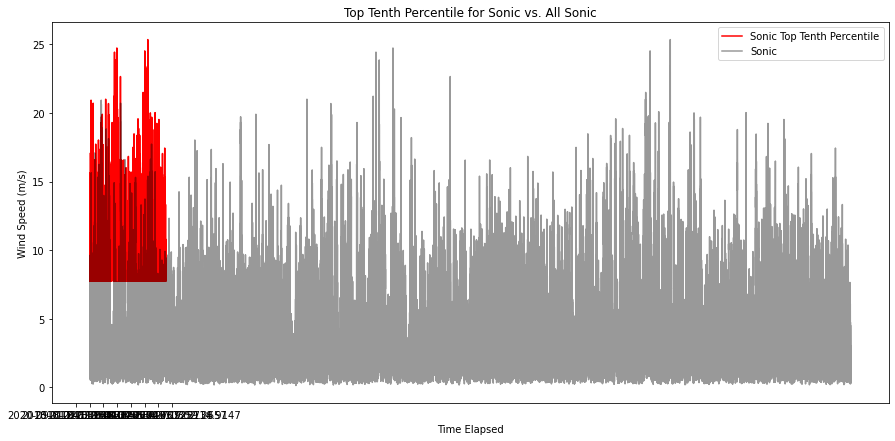

In [32]:
dfSTT = dfSonicTT.sort_values('datetime', ascending=True)
ax = dfSTT.plot(kind = 'line', x = 'datetime', y = 'Spd', color='red', figsize = (15, 7), label = "Sonic Top Tenth Percentile")
dfSonicConcat.plot(kind = 'line', x = 'datetime', y = 'Spd', color = 'black', alpha = 0.4, figsize = (15, 7), ax = ax, label = "Sonic")
ax.set_xlabel("Time Elapsed")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Top Tenth Percentile for Sonic vs. All Sonic")

The axis looks a little weird, but we can clearly see this is taking the top tenth of our max wind speed data for Sonic. It's taking the top wind speeds that cover 10% of our full data. $\checkmark$

**AVERAGING SONIC DATA (24-HOUR MEAN):**

Now let's try and smooth out our data and look at SONIC data graphed over a period of a day. We know SONIC files are in 5-minute intervals, and there are 288 5-minute intervals in the day. So we need to combine the mean over each consecutive $288$ data points to make one point for a day.

In [33]:
dfSonicConcat['datetime'] =  pd.to_datetime(dfSonicConcat['datetime'])
df_SC = dfSonicConcat.groupby(dfSonicConcat.datetime.dt.date).mean()
df_SC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 2018-01-24 to 2020-09-18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Spd     969 non-null    float64
 1   Dir     969 non-null    float64
dtypes: float64(2)
memory usage: 22.7+ KB


Text(0.5, 1.0, 'Daily Average for Sonic')

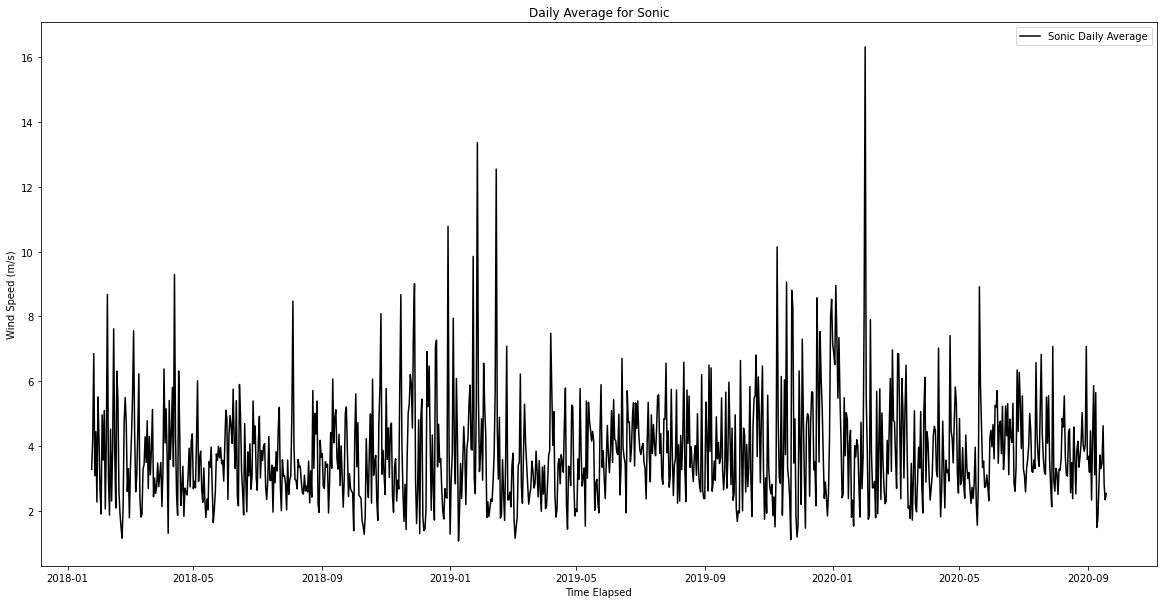

In [35]:
ax = df_SC.plot(kind = 'line', y = 'Spd', color='black', figsize = (20, 10), label = "Sonic Daily Average")
ax.set_xlabel("Time Elapsed")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Daily Average for Sonic")

**OVERLAYED DAILY AVERAGES FOR SONIC AND WXT:**

Let's overlay the daily averages for WXT and SONIC.

Text(0.5, 1.0, 'Daily Averages for Sonic vs. WXT')

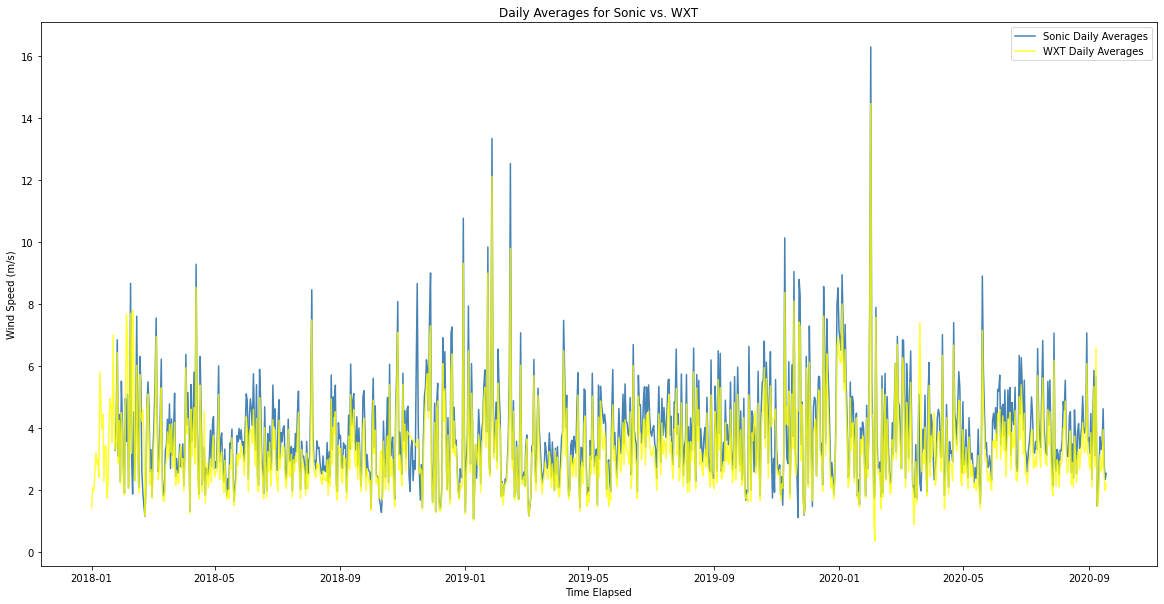

In [39]:
ax = df_SC.plot(kind = 'line', y = 'Spd', color='steelblue', figsize = (20, 10), label = "Sonic Daily Averages")
df_new.plot(kind = 'line', y = 'wspd', color = 'yellow', alpha = 0.8, figsize = (20, 10), ax = ax, label = "WXT Daily Averages")
ax.set_xlabel("Time Elapsed")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Daily Averages for Sonic vs. WXT")

In [ ]:
#Plot wind directions along y axis from 0 to 360. (We're seeing a shift of 22.5)